# YOLO v3 
importing necessary libraries and defining some funtions to detect object and count number of apples in an image and a video



In [1]:
import os
import time
import cv2
import numpy as np
from yolo_model import YOLO

In [2]:
def process_image(img):
    """Resize, reduce and expand image.

    # Argument:
        img: original image.

    # Returns
        image: ndarray(64, 64, 3), processed image.
    """
    image = cv2.resize(img, (416, 416),
                       interpolation=cv2.INTER_CUBIC)
    image = np.array(image, dtype='float32')
    image /= 255.
    image = np.expand_dims(image, axis=0)

    return image

In [3]:
def get_classes(file):
    """Get classes name.

    # Argument:
        file: classes name for database.

    # Returns
        class_names: List, classes name.

    """
    with open(file) as f:
        class_names = f.readlines()
    class_names = [c.strip() for c in class_names]

    return class_names

In [4]:
def draw(image, boxes, scores, classes, all_classes):
    """Draw the boxes on the image.

    # Argument:
        image: original image.
        boxes: ndarray, boxes of objects.
        classes: ndarray, classes of objects.
        scores: ndarray, scores of objects.
        all_classes: all classes name.
    """
    count=0
    for box, score, cl in zip(boxes, scores, classes):
        x, y, w, h = box

        top = max(0, np.floor(x + 0.5).astype(int))
        left = max(0, np.floor(y + 0.5).astype(int))
        right = min(image.shape[1], np.floor(x + w + 0.5).astype(int))
        bottom = min(image.shape[0], np.floor(y + h + 0.5).astype(int))
        
        cv2.rectangle(image, (top, left), (right, bottom), (255, 0, 0), 10)
        cv2.putText(image, '{0} {1:.2f}'.format(all_classes[cl], score),
                    (top, left - 6),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    0.6, (0, 0, 255), 30,
                    cv2.LINE_AA)
        if all_classes[cl]=='apple':
            count=count+1

        print('class: {0}, score: {1:.2f}'.format(all_classes[cl], score))
        print('box coordinate x,y,w,h: {0}'.format(box))
        print('count:{0}'.format(count))
        
    
    print()

In [5]:
def detect_image(image, yolo, all_classes):
    """Use yolo v3 to detect images.

    # Argument:
        image: original image.
        yolo: YOLO, yolo model.
        all_classes: all classes name.

    # Returns:
        image: processed image.
    """
    pimage = process_image(image)

    start = time.time()
    boxes, classes, scores = yolo.predict(pimage, image.shape)
    end = time.time()

    print('time: {0:.2f}s'.format(end - start))
            

    if boxes is not None:
        draw(image, boxes, scores, classes, all_classes)

    return image

In [6]:
def detect_video(video, yolo, all_classes):
    """Use yolo v3 to detect video.

    # Argument:
        video: video file.
        yolo: YOLO, yolo model.
        all_classes: all classes name.
    """
    video_path = os.path.join("videos", "test", video)
    camera = cv2.VideoCapture(video_path)
    cv2.namedWindow("detection", cv2.WINDOW_AUTOSIZE)

    # Prepare for saving the detected video
    sz = (int(camera.get(cv2.CAP_PROP_FRAME_WIDTH)),
        int(camera.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    fourcc = cv2.VideoWriter_fourcc(*'mpeg')

    
    vout = cv2.VideoWriter()
    vout.open(os.path.join("videos", "res", video), fourcc, 20, sz, True)

    while True:
        res, frame = camera.read()

        if not res:
            break

        image = detect_image(frame, yolo, all_classes)
        cv2.imshow("detection", image)

        # Save the video frame by frame
        vout.write(image)

        if cv2.waitKey(110) & 0xff == 27:
                break

    vout.release()
    camera.release()
    

In [7]:
yolo = YOLO(0.3, 0.5)
file = 'coco_classes.txt'
all_classes = get_classes(file)

### Detecting Images

In [8]:
f ='pexels-aphiwat-chuangchoem-347926.jpg'
path = f
image = cv2.imread(path)
image = detect_image(image, yolo, all_classes)


time: 2.96s
class: diningtable, score: 0.37
box coordinate x,y,w,h: [ 777.99876034   61.29794741 2478.84073853 2190.40088844]
count:0
class: apple, score: 0.89
box coordinate x,y,w,h: [1732.88783431  874.18813467  760.45913994  829.6726172 ]
count:1
class: apple, score: 0.82
box coordinate x,y,w,h: [579.64360714 472.4411099  869.38994378 781.31400633]
count:2
class: apple, score: 0.46
box coordinate x,y,w,h: [ 223.68184477 1354.705441    734.10642147  735.49468446]
count:3



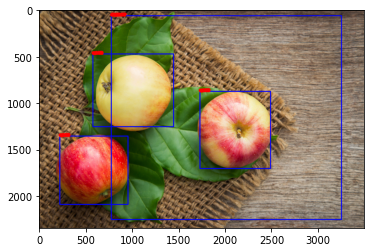

In [9]:
import matplotlib.pyplot as plt
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

# Detecting on Video

In [13]:
# # detect videos one at a time in videos/test folder    
video = 'highway.mp4'
detect_video(video, yolo, all_classes)